In [53]:
#Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\data science\\final projects csv files\\influencer.csv')


In [24]:
data

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [54]:
#DATA PREPROCESSING AND HANDLING MISSING VALUES
# Function to convert 'k', 'm', and 'b' strings to integers
def convert_to_int(value_str):
    multiplier = 1
    if 'k' in value_str:
        multiplier = 1000
    elif 'm' in value_str:
        multiplier = 1000000
    elif 'b' in value_str:
        multiplier = 1000000000
    return int(float(value_str.replace('k', '').replace('m', '').replace('b', '')) * multiplier)

# Step 1: Remove '\n' from 'Channel Info' column
data['Channel Info'] = data['Channel Info'].str.strip()

# Step 2: Convert 'Followers' column to numeric
data['Followers'] = data['Followers'].str.replace('m', '').astype(float) * 1000000

# Step 3: Convert 'Avg. Likes' column to numeric
data['Avg. Likes'] = data['Avg. Likes'].apply(convert_to_int)

# Step 4: Convert 'Posts' column to numeric
data['Posts'] = data['Posts'].apply(convert_to_int)

# Step 5: Convert '60-Day Eng Rate' column to numeric
data['60-Day Eng Rate'] = data['60-Day Eng Rate'].astype(float)

# Step 6: Convert 'New Post Avg. Likes' column to numeric
data['New Post Avg. Likes'] = data['New Post Avg. Likes'].apply(convert_to_int)

# Step 7: Convert 'Total Likes' column to numeric
data['Total Likes'] = data['Total Likes'].apply(convert_to_int)

# Check the preprocessed data
print(data.head())


   Rank Channel Info  Influence Score    Followers  Avg. Likes  Posts  \
0     1    cristiano               92  485200000.0     8700000   3400   
1     2  kyliejenner               91  370700000.0     8199999   7000   
2     3     leomessi               90  363900000.0     6700000    915   
3     4  selenagomez               93  348800000.0     6100000   1900   
4     5      therock               91  339400000.0     1800000   6800   

   60-Day Eng Rate  New Post Avg. Likes  Total Likes Country Or Region  
0            0.013              6300000  29100000000             Spain  
1            0.014              5000000  57400000000     United States  
2            0.010              3500000   6100000000               NaN  
3            0.005              1700000  11400000000     United States  
4            0.003               932000  12600000000     United States  


   Rank Channel Info  Influence Score    Followers  Avg. Likes  Posts  \
0     1    cristiano               92  485200000.0     8700000   3400   
1     2  kyliejenner               91  370700000.0     8199999   7000   
2     3     leomessi               90  363900000.0     6700000    915   
3     4  selenagomez               93  348800000.0     6100000   1900   
4     5      therock               91  339400000.0     1800000   6800   

   60-Day Eng Rate  New Post Avg. Likes  Total Likes Country Or Region  
0            0.013              6300000  29100000000             Spain  
1            0.014              5000000  57400000000     United States  
2            0.010              3500000   6100000000               NaN  
3            0.005              1700000  11400000000     United States  
4            0.003               932000  12600000000     United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       

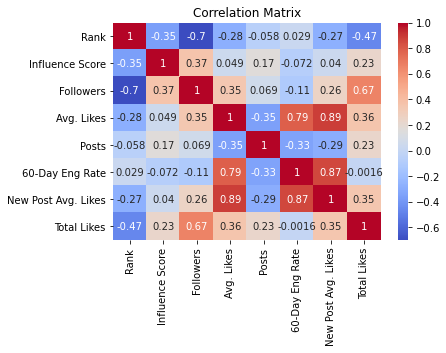

In [73]:
#Step 2: Data Exploration and Preprocessing

# Check the first few rows of the dataset
print(data.head())

# Check the data types and missing values
print(data.info())

# Summary statistics
print(data.describe())

# Check for any correlated features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [77]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Get the absolute correlation values for all pairs of features
correlation_values = correlation_matrix.abs()

# Filter out the correlations between the same feature pairs and the correlations with value 1 (perfect correlation)
correlation_values = correlation_values[correlation_values < 1]

# Stack the correlation matrix to get pairs of features with their correlation values
correlation_pairs = correlation_values.stack().reset_index()

# Rename the columns
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort the correlation pairs by correlation value in descending order
correlation_pairs_sorted = correlation_pairs.sort_values(by='Correlation', ascending=False)

# Print the highly correlated pairs (correlation > 0.8 for example)
highly_correlated_pairs = correlation_pairs_sorted[correlation_pairs_sorted['Correlation'] > 0.8]
print("1st QUESTION: Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.")
print("\nHighly Correlated Pairs (Correlation > 0.8):")
print(highly_correlated_pairs)



1st QUESTION: Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

Highly Correlated Pairs (Correlation > 0.8):
              Feature 1            Feature 2  Correlation
45  New Post Avg. Likes           Avg. Likes     0.892784
26           Avg. Likes  New Post Avg. Likes     0.892784
47  New Post Avg. Likes      60-Day Eng Rate     0.866293
40      60-Day Eng Rate  New Post Avg. Likes     0.866293


2nd QUESTION : What is the frequency distribution of the following features?
Influence Score
Followers 
Posts



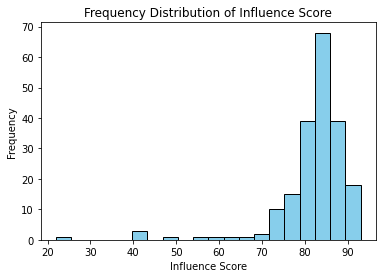

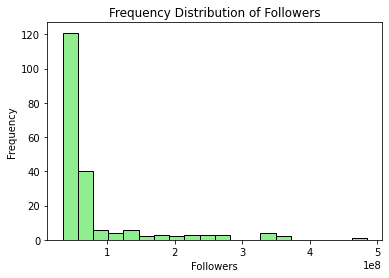

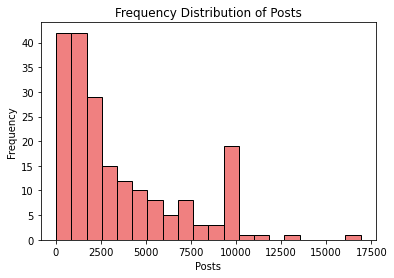

In [79]:
#Step 3: Frequency Distribution of Features

# Frequency distribution of Influence Score
print('''2nd QUESTION : What is the frequency distribution of the following features?
Influence Score
Followers 
Posts
''')
plt.hist(data['Influence Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Influence Score')
plt.show()

# Frequency distribution of Followers
plt.hist(data['Followers'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Followers')
plt.show()

# Frequency distribution of Posts
plt.hist(data['Posts'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Posts')
plt.show()


3rd QUESTION : Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart


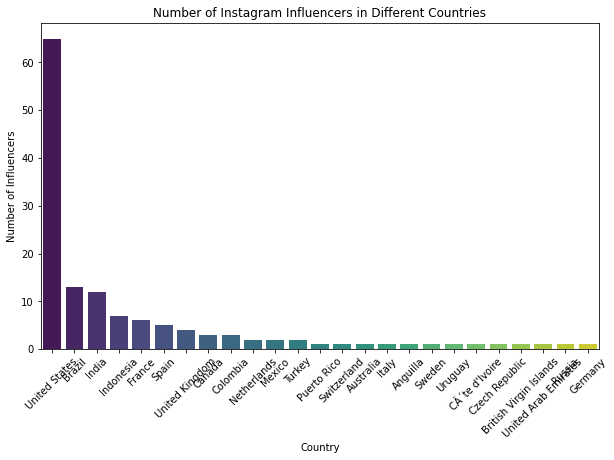

In [80]:
#Step 4: Country with the Highest Number of Instagram Influencers

# Count of Instagram influencers in different countries or regions
print("3rd QUESTION : Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart")
country_counts = data['Country Or Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Number of Instagram Influencers in Different Countries')
plt.xticks(rotation=45)
plt.show()


In [82]:
#Step 5: Top 10 Influencers based on Different Features

print('''4th QUESTION : Who are the top 10 influencers in the given dataset based on the following features
Followers
Average likes
Total Likes
''')
# Top 10 influencers based on Followers (descending order)
top_followers = data.nlargest(10, 'Followers', keep='first')  # 'keep' parameter is set to 'first' to handle ties
print("Top 10 influencers based on Followers:\n", top_followers)

# Top 10 influencers based on Average Likes (descending order)
top_avg_likes = data.nlargest(10, 'Avg. Likes', keep='first')
print("\nTop 10 influencers based on Average Likes:\n", top_avg_likes)

# Top 10 influencers based on Total Likes (descending order)
top_total_likes = data.nlargest(10, 'Total Likes', keep='first')
print("\nTop 10 influencers based on Total Likes:\n", top_total_likes)



4th QUESTION : Who are the top 10 influencers in the given dataset based on the following features
Followers
Average likes
Total Likes

Top 10 influencers based on Followers:
    Rank     Channel Info  Influence Score    Followers  Avg. Likes  Posts  \
0     1        cristiano               92  485200000.0     8700000   3400   
1     2      kyliejenner               91  370700000.0     8199999   7000   
2     3         leomessi               90  363900000.0     6700000    915   
3     4      selenagomez               93  348800000.0     6100000   1900   
4     5          therock               91  339400000.0     1800000   6800   
5     6     arianagrande               92  333000000.0     3700000   5000   
6     7    kimkardashian               91  330700000.0     3500000   5700   
7     8          beyonce               92  276100000.0     3600000   2000   
8     9  khloekardashian               89  273900000.0     2400000   4100   
9    10     justinbieber               91  260000000.0

5th QUESTION : Describe the relationship between the following pairs of features using a suitable graph
Followers and Total Likes
Followers and Influence Score
Posts and Average likes
Posts and Influence Score   



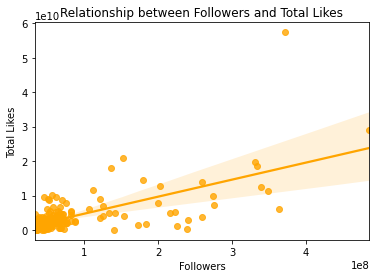

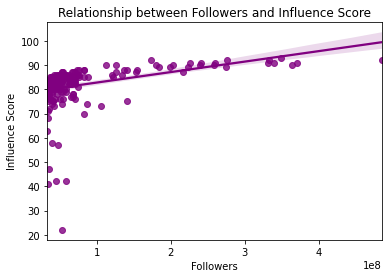

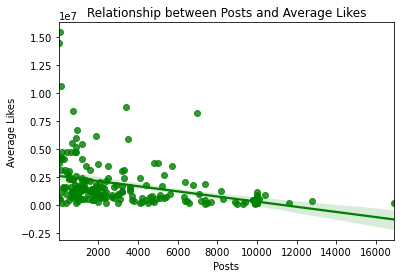

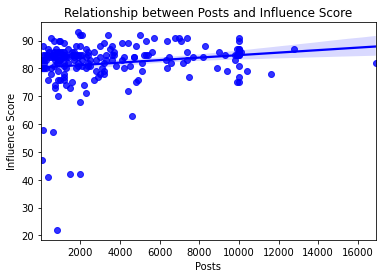

In [83]:
print('''5th QUESTION : Describe the relationship between the following pairs of features using a suitable graph
Followers and Total Likes
Followers and Influence Score
Posts and Average likes
Posts and Influence Score   
''')
sns.regplot(x='Followers', y='Total Likes', data=data, color='orange')
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship between Followers and Total Likes')
plt.show()

sns.regplot(x='Followers', y='Influence Score', data=data, color='purple')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers and Influence Score')
plt.show()

sns.regplot(x='Posts', y='Avg. Likes', data=data, color='green')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.title('Relationship between Posts and Average Likes')
plt.show()


sns.regplot(x='Posts', y='Influence Score', data=data, color='blue')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Posts and Influence Score')
plt.show()



5th QUESTION : Describe the relationship between the following pairs of features using a suitable graph
Followers and Total Likes
Followers and Influence Score
Posts and Average likes
Posts and Influence Score   



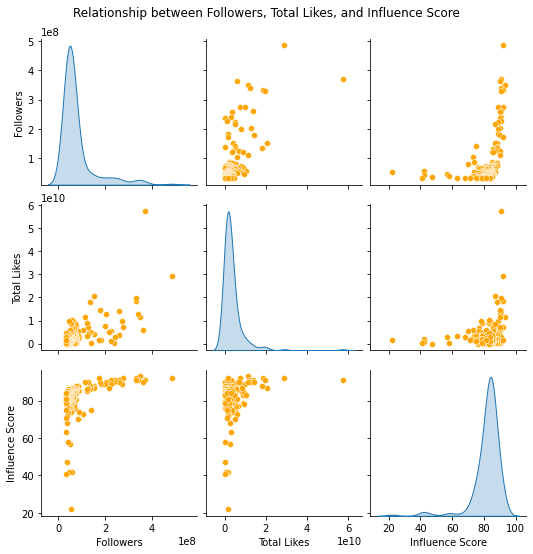

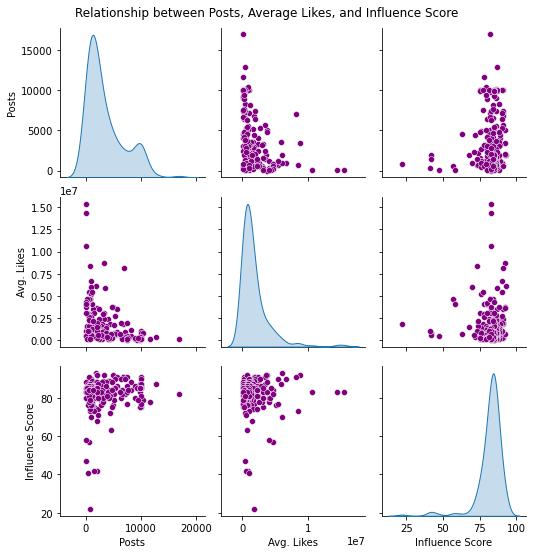

In [84]:
print('''5th QUESTION : Describe the relationship between the following pairs of features using a suitable graph
Followers and Total Likes
Followers and Influence Score
Posts and Average likes
Posts and Influence Score   
''')
import seaborn as sns

# Relationship between Followers, Total Likes, and Influence Score
sns.pairplot(data[['Followers', 'Total Likes', 'Influence Score']], diag_kind='kde', plot_kws={'color':'orange'})
plt.suptitle('Relationship between Followers, Total Likes, and Influence Score', y=1.02)
plt.show()

# Relationship between Posts, Average Likes, and Influence Score
sns.pairplot(data[['Posts', 'Avg. Likes', 'Influence Score']], diag_kind='kde', plot_kws={'color':'purple'})
plt.suptitle('Relationship between Posts, Average Likes, and Influence Score', y=1.02)
plt.show()


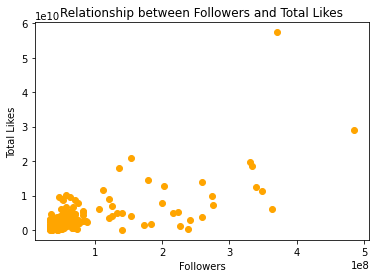

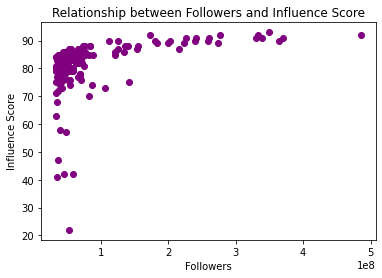

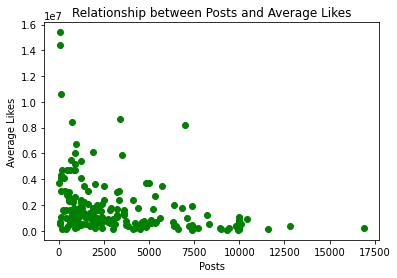

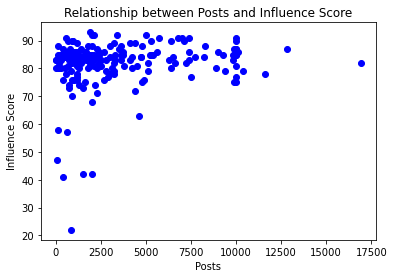

In [61]:
#Step 6: Relationship between Feature Pairs

# Relationship between Followers and Total Likes
plt.scatter(data['Followers'], data['Total Likes'], color='orange')
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship between Followers and Total Likes')
plt.show()

# Relationship between Followers and Influence Score
plt.scatter(data['Followers'], data['Influence Score'], color='purple')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers and Influence Score')
plt.show()

# Relationship between Posts and Average Likes
plt.scatter(data['Posts'], data['Avg. Likes'], color='green')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.title('Relationship between Posts and Average Likes')
plt.show()

# Relationship between Posts and Influence Score
plt.scatter(data['Posts'], data['Influence Score'], color='blue')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Posts and Influence Score')
plt.show()
